# San Diego Burrito Analytics

Scott Cole

23 April 2016

This notebook contains analyses on the burrito ratings in San Diego

# Default imports

In [9]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("white")

C:\Users\Scott\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Load data

In [71]:
def loadburritos(filename="ratings04232016.csv",
                 cols = ['Location','Burrito','Date','Neighborhood','Hunger',
                        'Cost','chips?','Tortilla','Temp','Meat','Fillings',
                        'Meat:filling','Uniformity','Salsa','Synergy','Wrap',
                         'overall','Reviewer']):
    """This function loads data of burrito reivews and organizes it into a dictionary
    """
    # Load data
    import csv
    reader=csv.reader(open("ratings04232016.csv","rb"),delimiter=',')
    csvinput=list(reader)
    
    # Separate headers from data
    headerrow = csvinput[0]
    burritodata = np.array(csvinput[1:])
    Nbur, C = np.shape(burritodata)
    
    # Organize burrito data into a dictionary
    data = {}
    for c in cols:
        data[c] = np.zeros(Nbur,dtype='object')
        colidx = headerrow.index(c)
        for b in range(Nbur):
            data[c][b] = burritodata[b,colidx]
            
    return data, cols

In [72]:
data, cols = loadburritos()

# Describe the data

In [82]:
# Number of restaurants
print 'Number of burritos:', len(data['Location'])
print 'Number of restaurants:', len(np.unique(data['Location']))
print 'Number of reviews by Scott:', np.sum(data['Reviewer']=='Scott')
print 'Number of reviews by Emily:', np.sum(data['Reviewer']=='Emily')

Number of burritos: 73
Number of restaurants: 25
Number of reviews by Scott: 28
Number of reviews by Emily: 15


In [134]:
typecounts.keys()

['carne asada', 'surf.*turf', 'adobada', 'cali', 'other', 'chicken', 'carnita']

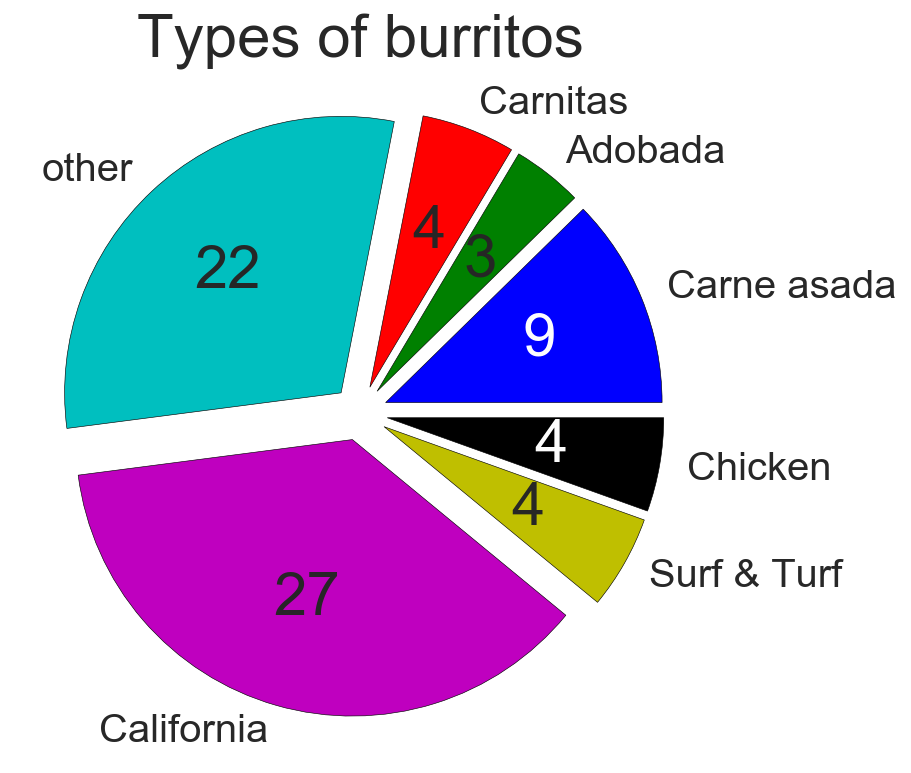

In [157]:
# Number of each type of burrito
def burritotypes(x, types = {'California':'cali', 'Carnitas':'carnita', 'Carne asada':'carne asada',
                             'Chicken':'chicken', 'Surf & Turf':'surf.*turf', 'Adobada':'adobada'}):
    import re
    T = len(types)
    Nmatches = {}
    for b in x:
        matched = False
        for t in types.keys():
            re4str = re.compile('.*'+types[t]+'.*', re.IGNORECASE)
            if np.logical_and(re4str.match(b) is not None, matched is False):
                try:
                    Nmatches[t] +=1
                except KeyError:
                    Nmatches[t] = 1
                matched = True
        if matched is False:
            try:
                Nmatches['other'] +=1
            except KeyError:
                Nmatches['other'] = 1
    return Nmatches

typecounts = burritotypes(data['Burrito'])

plt.figure(figsize=(6,6))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = typecounts.keys()
fracs = typecounts.values()
explode=[.1]*len(typecounts)

patches, texts, autotexts = plt.pie(fracs, explode=explode, labels=labels,
                autopct=lambda(p): '{:.0f}'.format(p * np.sum(fracs) / 100), shadow=False, startangle=0)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.

plt.title('Types of burritos',size=30)
for t in texts:
    t.set_size(20)
for t in autotexts:
    t.set_size(30)
autotexts[0].set_color('w')
autotexts[6].set_color('w')

figname = 'burritotypes'
plt.savefig('C:/Users/Scott/Google Drive/qwm/burritos/figs/'+figname + '.png')

In [125]:
typecounts

{'adobada': 3,
 'cali': 27,
 'carne asada': 9,
 'carnita': 4,
 'chicken': 5,
 'other': 22,
 'surf.*turf': 4}

In [ ]:
# Time series of ratings

In [ ]:
# Distribution of hunger level

In [ ]:
# Average burrito cost

In [ ]:
# What percentage of places offer free chips?

In [ ]:
# Distributions of all of the ratings
# Tortilla, temperature, meat, fillings, meat:filling, uniformity, salsa, synergy, wrap

In [ ]:
# Distribution of final ratings

In [70]:
data[cols[2]]

array(['1/18/2016', '1/24/2016', '1/24/2016', '1/24/2016', '1/27/2016',
       '1/28/2016', '1/30/2016', '1/30/2016', '2/1/2016', '2/6/2016',
       '2/6/2016', '2/11/2016', '2/11/2016', '2/11/2016', '2/11/2016',
       '2/12/2016', '2/12/2016', '2/14/2016', '2/14/2016', '2/17/2016',
       '2/17/2016', '2/24/2016', '2/24/2016', '2/28/2016', '2/28/2016',
       '2/29/2016', '2/29/2016', '3/3/2016', '3/3/2016', '3/3/2016',
       '3/8/2016', '3/8/2016', '3/11/2016', '3/11/2016', '3/14/2016',
       '3/14/2016', '3/14/2016', '3/14/2016', '3/17/2016', '3/18/2016',
       '3/18/2016', '3/19/2016', '3/20/2016', '3/20/2016', '3/21/2016',
       '3/21/2016', '3/21/2016', '3/21/2016', '3/21/2016', '3/21/2016',
       '3/23/2016', '3/23/2016', '3/30/2016', '3/30/2016', '4/2/2016',
       '4/2/2016', '4/2/2016', '4/2/2016', '4/3/2016', '4/3/2016',
       '4/7/2016', '4/7/2016', '4/9/2016', '4/9/2016', '4/14/2016',
       '4/14/2016', '4/15/2016', '4/15/2016', '4/15/2016', '4/15/2016',
       '4/

Test ideas
* Is there a day of the week of the most burritos / best burritos?
*Peoples whose names start with K rate burritos higher than most